# Titanic - End to End ML Process and Python Refresher

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import numpy as np

In [12]:
test = pd.read_csv(r"C:\Users\jdonv\OneDrive - Queen's University\MMA869 - Machine Learning & AI\Sandbox\test.csv")
train = pd.read_csv(r"C:\Users\jdonv\OneDrive - Queen's University\MMA869 - Machine Learning & AI\Sandbox\train.csv")
print("Dimensions of train: {}".format(train.shape))
print("Dimensions of test: {}".format(test.shape))

Dimensions of train: (891, 12)
Dimensions of test: (418, 11)


## Data Understanding
### Data Structure

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Data Visualization & Insights

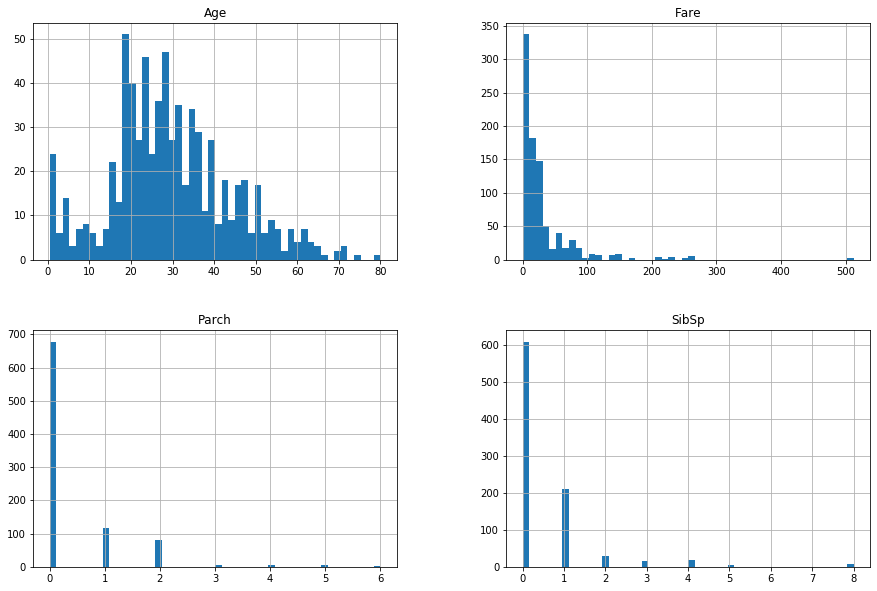

In [17]:
train.loc[:, ['Age', 'SibSp', 'Parch', 'Fare']].hist(bins=50, figsize=(15,10))
plt.show()

In [18]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="dodgerblue", lw=4),
                Line2D([0], [0], color="orange", lw=4)]

In [19]:

## Code inspired by: https://www.kaggle.com/lucabasa/credit-card-default-a-very-pedagogical-notebook
## Histogram stylization from: https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/
## Custom Legends: Custom Legend https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/custom_legends.html
def draw_distplot(df, variables, n_rows, n_cols, title):
    fig=plt.figure(figsize=(15,5))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        sns.distplot(df.loc[df.Survived==1, var_name] , color="dodgerblue", ax=ax, axlabel=False, kde=True, kde_kws={'bw': 1})
        sns.distplot(df.loc[df.Survived==0, var_name] , color="orange", ax=ax, axlabel=False, kde=True, kde_kws={'bw': 1})
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    fig.legend(custom_lines, ['1', '0'], loc='upper right', borderaxespad=0.)
    fig.suptitle(title, fontsize=16, y=1.08)
    plt.show()

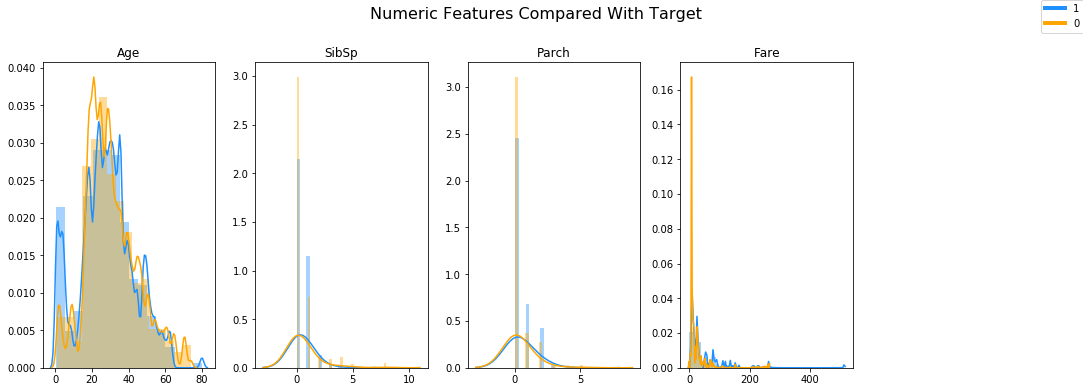

In [21]:
draw_distplot(train, ['Age', 'SibSp', 'Parch', 'Fare'], 1, 5, "Numeric Features Compared With Target")

In [22]:
def combine(counts, percentages):
    fmt = '{} ({:.1f}%)'.format
    return [fmt(c, p) for c, p in zip(counts, percentages)]

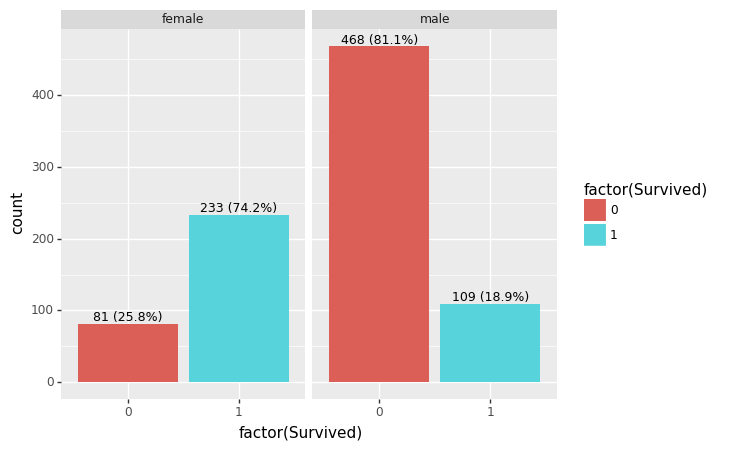

<ggplot: (-9223371865893594540)>

In [23]:
(ggplot(train, aes('factor(Survived)', fill='factor(Survived)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(combine(count, 100*prop))', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     size=9
 )
 + facet_wrap('Sex')
)

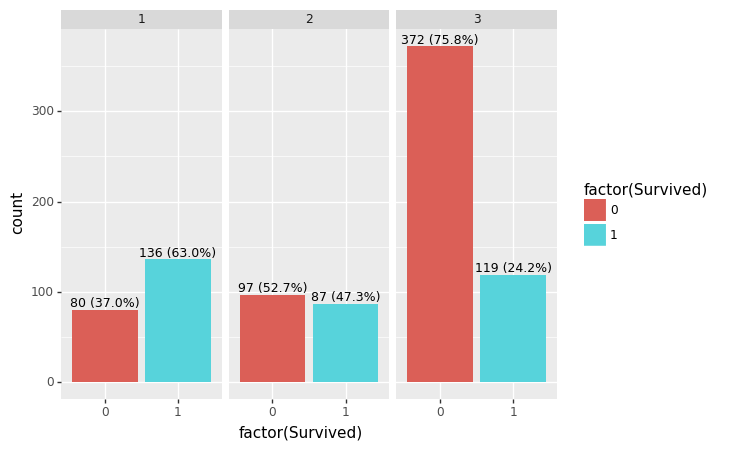

<ggplot: (-9223371865894584504)>

In [24]:
(ggplot(train, aes('factor(Survived)', fill='factor(Survived)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(combine(count, 100*prop))', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     size=9
 )
 + facet_wrap('Pclass')
)

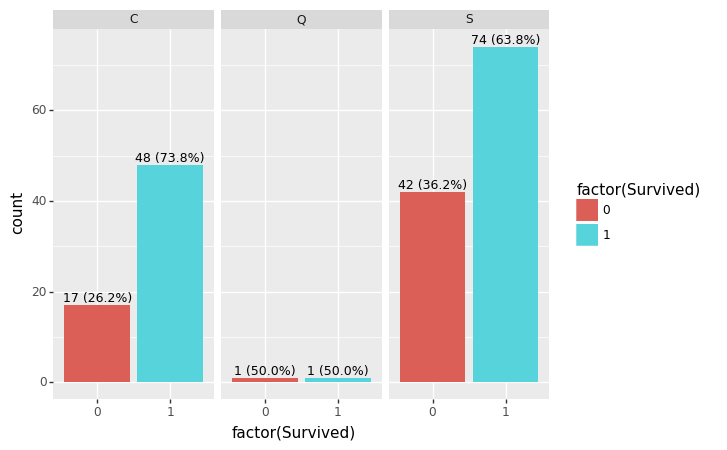

<ggplot: (-9223371865894815524)>

In [25]:
(ggplot(train.dropna(), aes('factor(Survived)', fill='factor(Survived)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(combine(count, 100*prop))', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     size=9
 )
 + facet_wrap('Embarked')
)

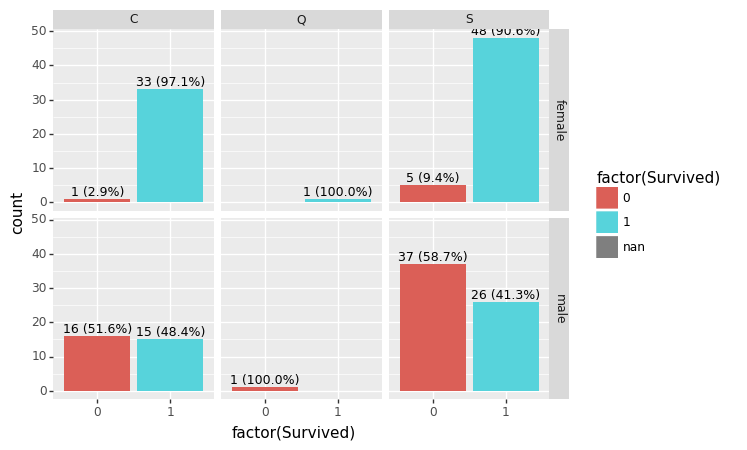

<ggplot: (-9223371865894227732)>

In [26]:
(ggplot(train.dropna(), aes('factor(Survived)', fill='factor(Survived)'))
 + geom_bar()
 + geom_text(
     aes(label='stat(combine(count, 100*prop))', group=1),
     stat='count',
     nudge_y=0.125,
     va='bottom',
     size=9
 )
 + facet_grid("Sex ~ Embarked")
)

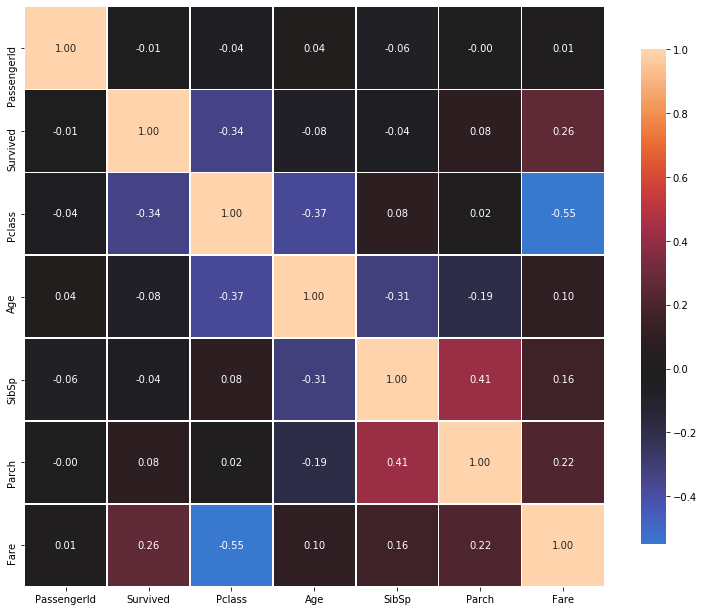

In [27]:
## Code modified from: https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(13,13))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train)

## Data Preparation
### Feature Engineering and Missing Values

In [28]:
test['Survived']=0
test['set']="test"
train['set']="train"
combined = pd.concat([train, test])

#### Honorifics 

In [29]:
combined['Honorific'] = (combined['Name'].str.split(pat = ",").str[1]).str.split().str[0]
combined.loc[(combined['Honorific']=="Dr.") | (combined['Honorific']=="Rev.") |
          (combined['Honorific']=="Col.") | (combined['Honorific']=="Major.") |
          (combined['Honorific']=="Capt.") | (combined['Honorific']=="Jonkheer.") |
          (combined['Honorific']=="Dona.") | (combined['Honorific']=="Sir.") |
          (combined['Honorific']=="Don.") | (combined['Honorific']=="Lady.") |
          (combined['Honorific']=="the"), 'Honorific'] = "Military & Other"
combined.loc[(combined['Honorific']=="Ms.") | (combined['Honorific']=="Mlle."), 'Honorific'] = "Miss."
combined.loc[(combined['Honorific']=="Mme."),'Honorific'] = "Mrs."

In [30]:
combined['Honorific'].value_counts()

Mr.                 757
Miss.               264
Mrs.                198
Master.              61
Military & Other     29
Name: Honorific, dtype: int64

In [31]:
combined[combined['Age'].notnull()].groupby(['Pclass','Sex','Honorific'])['Age'].median()

Pclass  Sex     Honorific       
1       female  Military & Other    43.5
                Miss.               30.0
                Mrs.                45.0
        male    Master.              6.0
                Military & Other    49.5
                Mr.                 41.5
2       female  Miss.               20.0
                Mrs.                30.5
        male    Master.              2.0
                Military & Other    41.5
                Mr.                 30.0
3       female  Miss.               18.0
                Mrs.                31.0
        male    Master.              6.0
                Mr.                 26.0
Name: Age, dtype: float64

In [32]:
combined[combined['Age'].isnull()].groupby(['Pclass','Sex','Honorific'])['Name'].count()

Pclass  Sex     Honorific       
1       female  Miss.                 1
                Mrs.                 10
        male    Military & Other      1
                Mr.                  27
2       female  Miss.                 2
                Mrs.                  1
        male    Mr.                  13
3       female  Miss.                48
                Mrs.                 16
        male    Master.               8
                Mr.                 136
Name: Name, dtype: int64

In [33]:
# Let's flag those ages that we computed with a dummy
combined['MissingAge'] = [1 if pd.isna(x)==True else 0 for x in combined['Age']]
combined['Age'] = combined['Age'].fillna(combined.groupby(['Pclass','Sex','Honorific'])['Age'].transform('median'))
combined[combined['MissingAge']==1].head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set,Honorific,MissingAge
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,Q,train,Mr.,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,244373,13.0000,NaN,S,train,Mr.,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,31.0,0,0,2649,7.2250,NaN,C,train,Mrs.,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,26.0,0,0,2631,7.2250,NaN,C,train,Mr.,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,18.0,0,0,330959,7.8792,NaN,Q,train,Miss.,1


#### Cabin

In [34]:
combined['Cabin'] = [x[0] if isinstance(x, str) else "U" for x in combined['Cabin']]

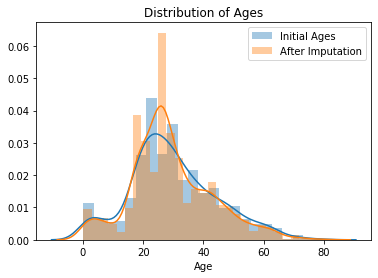

In [35]:
sns.distplot(combined[combined['MissingAge']==0]['Age'], label='Initial Ages')
sns.distplot(combined['Age'], label='After Imputation')
plt.title('Distribution of Ages')
plt.legend()

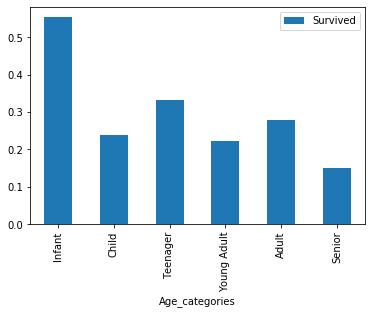

In [36]:
# Code from: https://www.dataquest.io/blog/kaggle-fundamentals/
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
combined = process_age(combined,cut_points,label_names)

pivot = combined.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

#### Family Size

In [37]:
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1

In [38]:
family_survive = combined.groupby('FamilySize')['Survived'].agg([lambda x: sum(x)/len(x)]).rename(columns={'<lambda>':'Percent Survived'})
family_survive

,Percent Survived
FamilySize,
1,0.206329
2,0.378723
3,0.371069
4,0.488372
5,0.136364
6,0.120000
7,0.250000
8,0.000000
11,0.000000


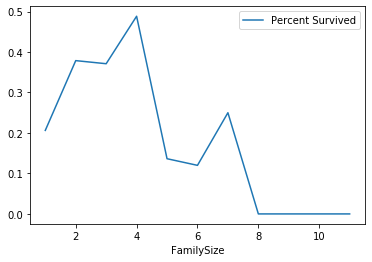

In [39]:
family_survive.plot()

Survival rates take a hit with larger families

In [40]:
combined['LargeFam'] =  combined.apply(lambda row: 1 if row['FamilySize'] > 4 else 0, axis = 1)

#### Fares

In [ ]:
## https://pbpython.com/pandas-qcut-cut.html

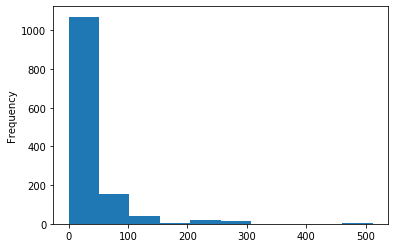

In [68]:
combined['Fare'].plot(kind='hist')

In [81]:
combined['FareBin'] = pd.qcut(combined['Fare'], q=6)

In [82]:
combined['FareBin'].value_counts()

(-0.001, 7.775]    236
(14.454, 26.0]     225
(7.775, 8.662]     218
(53.1, 512.329]    214
(26.0, 53.1]       212
(8.662, 14.454]    203
Name: FareBin, dtype: int64

In [83]:
fare_survive = combined.groupby('FareBin')['Survived'].agg([lambda x: sum(x)/len(x)]).rename(columns={'<lambda>':'Percent Survived'})
fare_survive

,Percent Survived
FareBin,
"(-0.001, 7.775]",0.135593
"(7.775, 8.662]",0.133028
"(8.662, 14.454]",0.251232
"(14.454, 26.0]",0.288889
"(26.0, 53.1]",0.316038
"(53.1, 512.329]",0.457944


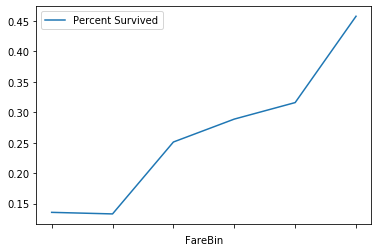

In [84]:
fare_survive.plot()

I want to add an identifier for those who had an expensive ticket over $50 since this appears to have some relationship with suriviving.

In [85]:
combined['ExpensiveTicket'] = [1 if x > 53 else 0 for x in combined['Fare']]

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [87]:
train = combined[combined['set']=="train"]
test = combined[combined['set']=="test"]

## Select and Train Model

In [88]:
dep_var = ['Survived']

#categorical_vars = ['Pclass', 'Embarked']
categorical_vars = ['Pclass', 'Sex', 'Age_categories', 'Honorific', 'Cabin', 'LargeFam', 'ExpensiveTicket']

discrete_vars = ['Age', 'SibSp', 'Parch']

continuous_vars = ['Fare']

In [89]:
cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

cat_transformers = [('cat', cat_pipe, categorical_vars)]

num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scl', StandardScaler())])

num_transformers = [('num', num_pipe, discrete_vars + continuous_vars)]

In [90]:
preprocessor = ColumnTransformer(transformers=cat_transformers + num_transformers)

In [91]:
holdout = test # from now on we will refer to this
               # dataframe as the holdout data

from sklearn.model_selection import train_test_split

all_X = train[categorical_vars+discrete_vars+continuous_vars]
all_y = train['Survived']

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.20,random_state=0)

### Train-Test Split on Logistic Regression Model

In [93]:
from sklearn.linear_model import LogisticRegression
lf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

lf.fit(train_X, train_y)
y_pred = lf.predict(test_X)
print("model score: %.3f" % lf.score(test_X, test_y))

model score: 0.827


In [94]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lf, all_X, all_y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.7752809  0.79775281 0.82022472 0.82022472 0.82222222 0.84269663
 0.84269663 0.84269663 0.86516854 0.86516854]
0.8294132334581772


### Evaluating Multiple Models using Crossvalidation

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate


models = [
    LogisticRegression(),
    DecisionTreeClassifier(random_state=0),
    GaussianNB(),
    SVC(gamma='auto'),
    GradientBoostingClassifier(random_state=0)
]


In [95]:
# Function modified from: https://www.scikit-yb.org/en/latest/tutorial.html

def score_model_cross_val(X, y, estimator, **kwargs):
    """
    Test various estimators.
    """
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', estimator)])


    scores = cross_validate(pipe, X, np.ravel(y), cv=5, scoring='accuracy', return_train_score=False)
    #print(scores)

    # Compute and return F1 (harmonic mean of precision and recall)
    print("{} accuracy: {}%, std: {}%".format(estimator.__class__.__name__, round(scores['test_score'].mean()*100, 3), round(scores['test_score'].var()*100, 3)))
    
    
#From pima-indian-diabetes-binary-classification.ipynb in Module 3-01, we see that training set is used
for model in models:
    score_model_cross_val(all_X, np.ravel(all_y), model)

LogisticRegression accuracy: 82.584%, std: 0.07%
DecisionTreeClassifier accuracy: 75.423%, std: 0.218%
GaussianNB accuracy: 78.092%, std: 0.091%
SVC accuracy: 83.567%, std: 0.084%
GradientBoostingClassifier accuracy: 81.744%, std: 0.1%


### Final Holdout Accuracy and Submission

I tried the two best models on Kaggle. The Logistic Regression gives a holdout accuracy score of 0.7727 and the SVC yields 0.77511.

In [96]:
lf.fit(all_X,all_y)
holdout_predictions = lf.predict(holdout[categorical_vars+discrete_vars+continuous_vars])
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submissionLR.csv",index=False)

In [97]:
svc = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC(gamma='auto'))])
svc.fit(all_X,all_y)
holdout_predictions = svc.predict(holdout[categorical_vars+discrete_vars+continuous_vars])
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)

submission.to_csv("submissionSVC.csv",index=False)